In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('diamonds.csv')

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


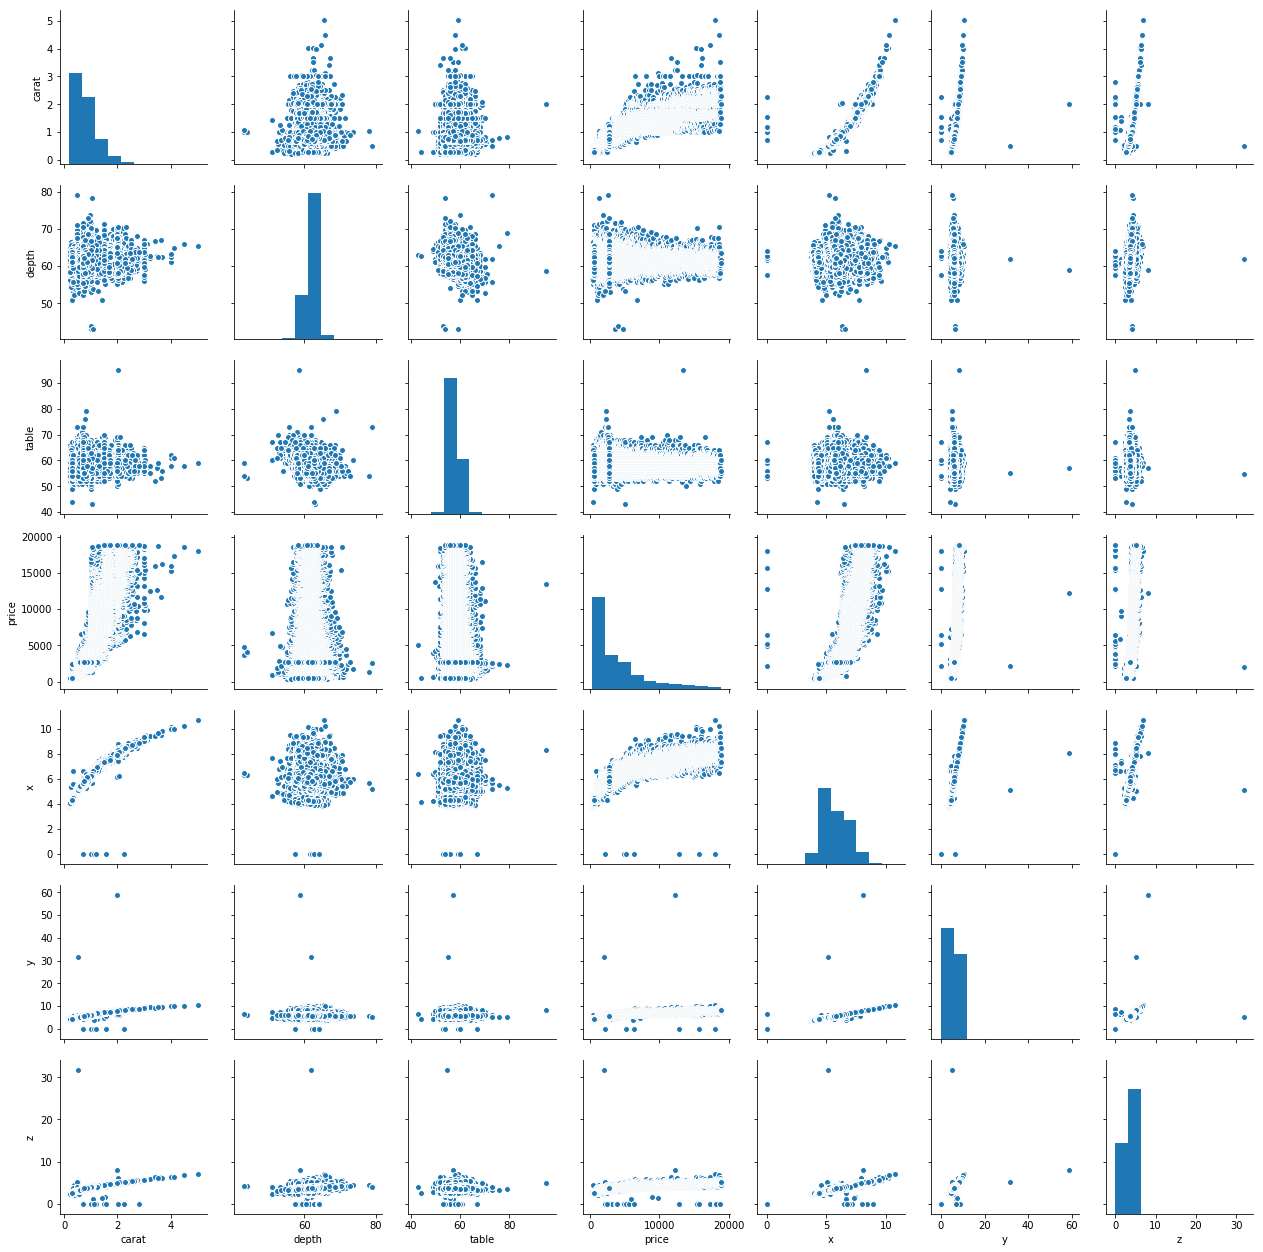

In [8]:
sns.pairplot(df)

In [9]:
X=df[['depth','table','x','y','z']].copy()

In [10]:
X.head()

,depth,table,x,y,z
0,61.5,55.0,3.95,3.98,2.43
1,59.8,61.0,3.89,3.84,2.31
2,56.9,65.0,4.05,4.07,2.31
3,62.4,58.0,4.20,4.23,2.63
4,63.3,58.0,4.34,4.35,2.75


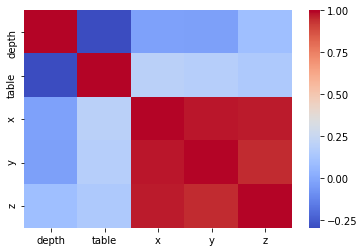

In [11]:
sns.heatmap(X.corr(),cmap='coolwarm')

In [12]:
df.drop(['x','y','z'],axis=1,inplace=True)

In [13]:
df.head()

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335


In [14]:
df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [15]:
df['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

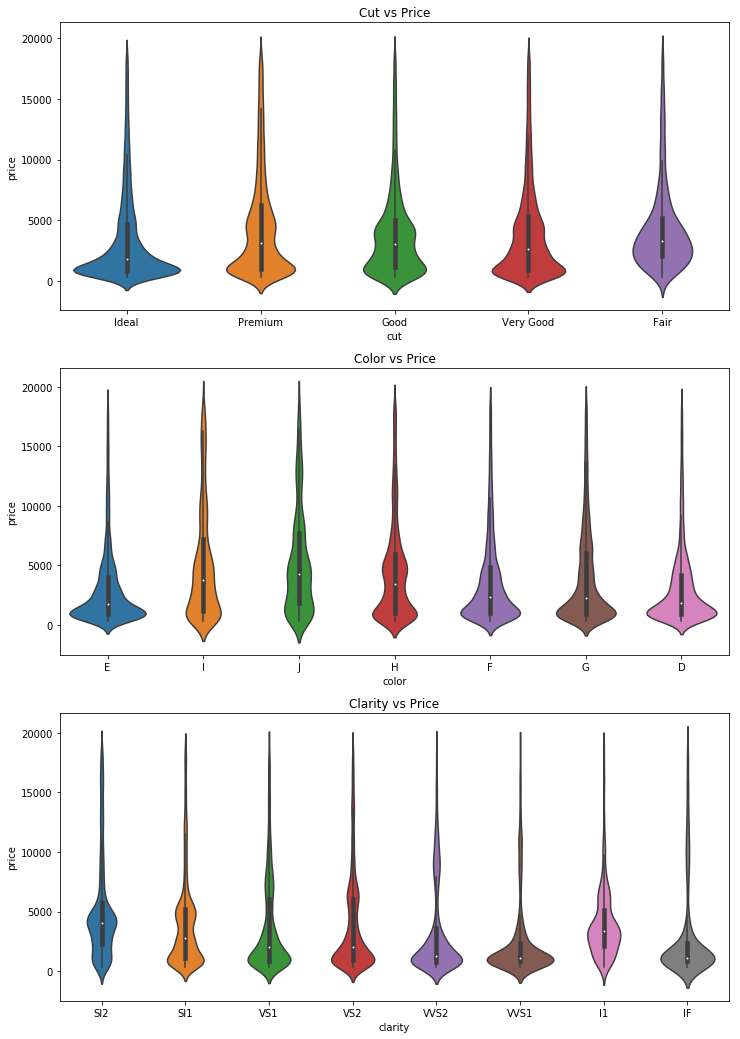

In [16]:
f, ax = plt.subplots(3,figsize=(12,18))
sns.violinplot(x='clarity',y='price',data=df,ax=ax[2])
sns.violinplot(x='color',y='price',data=df,ax=ax[1])
sns.violinplot(x='cut',y='price',data=df,ax=ax[0])
ax[0].set_title('Cut vs Price')
ax[1].set_title('Color vs Price')
ax[2].set_title('Clarity vs Price')

In [17]:
df.head()

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335


In [18]:
category={}

In [19]:
def Encoder(val):
    if val in category:
        return category[val]
    else:
        category[val]=len(category)
    return category[val]

In [20]:
df['cut']=df['cut'].apply(Encoder)
category={}
df['color']=df['color'].apply(Encoder)
category={}
df['clarity']=df['clarity'].apply(Encoder)

In [21]:
df.head()

,carat,cut,color,clarity,depth,table,price
0,0.23,0,0,0,61.5,55.0,326
1,0.21,1,0,1,59.8,61.0,326
2,0.23,2,0,2,56.9,65.0,327
3,0.29,1,1,3,62.4,58.0,334
4,0.31,2,2,0,63.3,58.0,335


In [22]:
df = (df - df.mean())/df.std()
df.head()

,carat,cut,color,clarity,depth,table,price
0,-1.198157,-0.970744,-1.548378,-1.277151,-0.174090,-1.099662,-0.904087
1,-1.240350,-0.180840,-1.548378,-0.711072,-1.360726,1.585514,-0.904087
2,-1.198157,0.609064,-1.548378,-0.144993,-3.384987,3.375631,-0.903836
3,-1.071577,-0.180840,-1.060610,0.421085,0.454129,0.242926,-0.902081
4,-1.029384,0.609064,-0.572842,-1.277151,1.082348,0.242926,-0.901831


In [23]:
train=df.sample(frac=0.8,random_state=200)
test=df.drop(train.index)

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43152 entries, 37658 to 4639
Data columns (total 7 columns):
carat      43152 non-null float64
cut        43152 non-null float64
color      43152 non-null float64
clarity    43152 non-null float64
depth      43152 non-null float64
table      43152 non-null float64
price      43152 non-null float64
dtypes: float64(7)
memory usage: 2.6 MB


In [33]:
X_train = train.iloc[:,0:6]
ones = np.ones([X_train.shape[0],1])
X_train = np.concatenate((ones,X_train),axis=1)

y= train.iloc[:,6:7].values
theta = np.zeros([1,7])

alpha = 0.01
iters = 1000

In [34]:
def CostFunc(X,y,theta):
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))

In [35]:
CostFunc(X_train,y,theta)

0.49721716555296502

In [38]:
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = CostFunc(X, y, theta)
    return theta,cost

In [39]:
g,cost = gradientDescent(X_train,y,theta,iters,alpha)
print(g)

finalCost = CostFunc(X_train,y,g)
print(finalCost)

[[ -1.58465764e-04   9.69324691e-01  -2.88551952e-02   3.98907323e-02
    1.21553914e-01  -3.94700294e-02  -3.24143228e-02]]
0.0650905146657


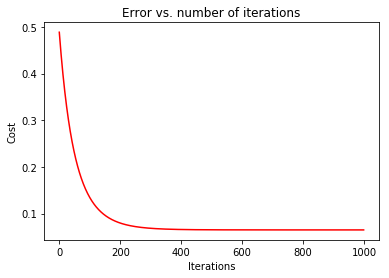

In [41]:
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. number of iterations')